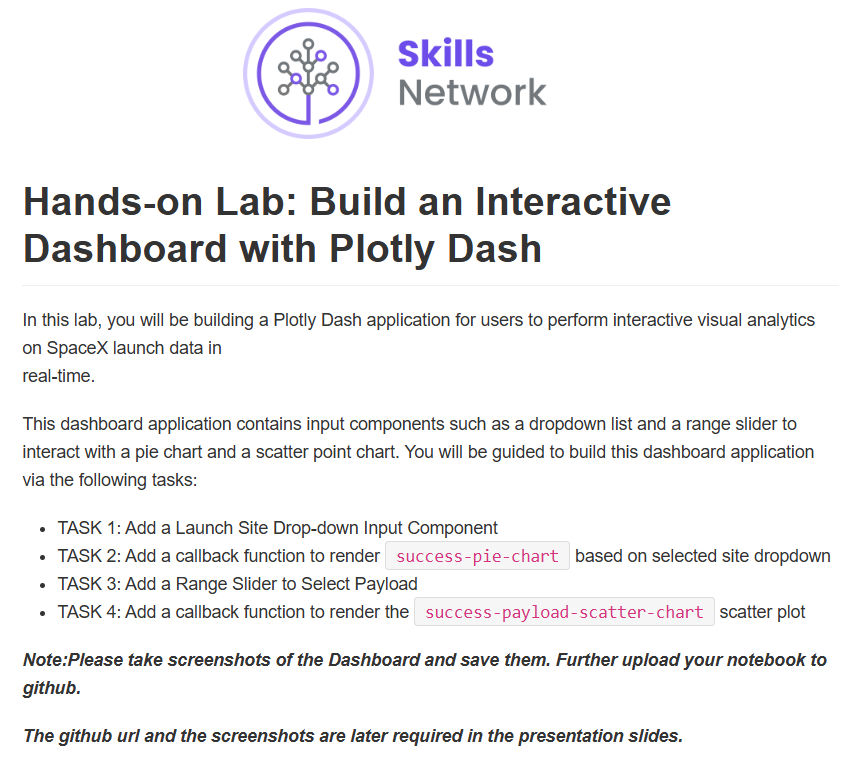

## LINK OF MY DASH :
https://maiyarsaker-8050.theiadockernext-1-labs-prod-theiak8s-4-tor01.proxy.cognitiveclass.ai/

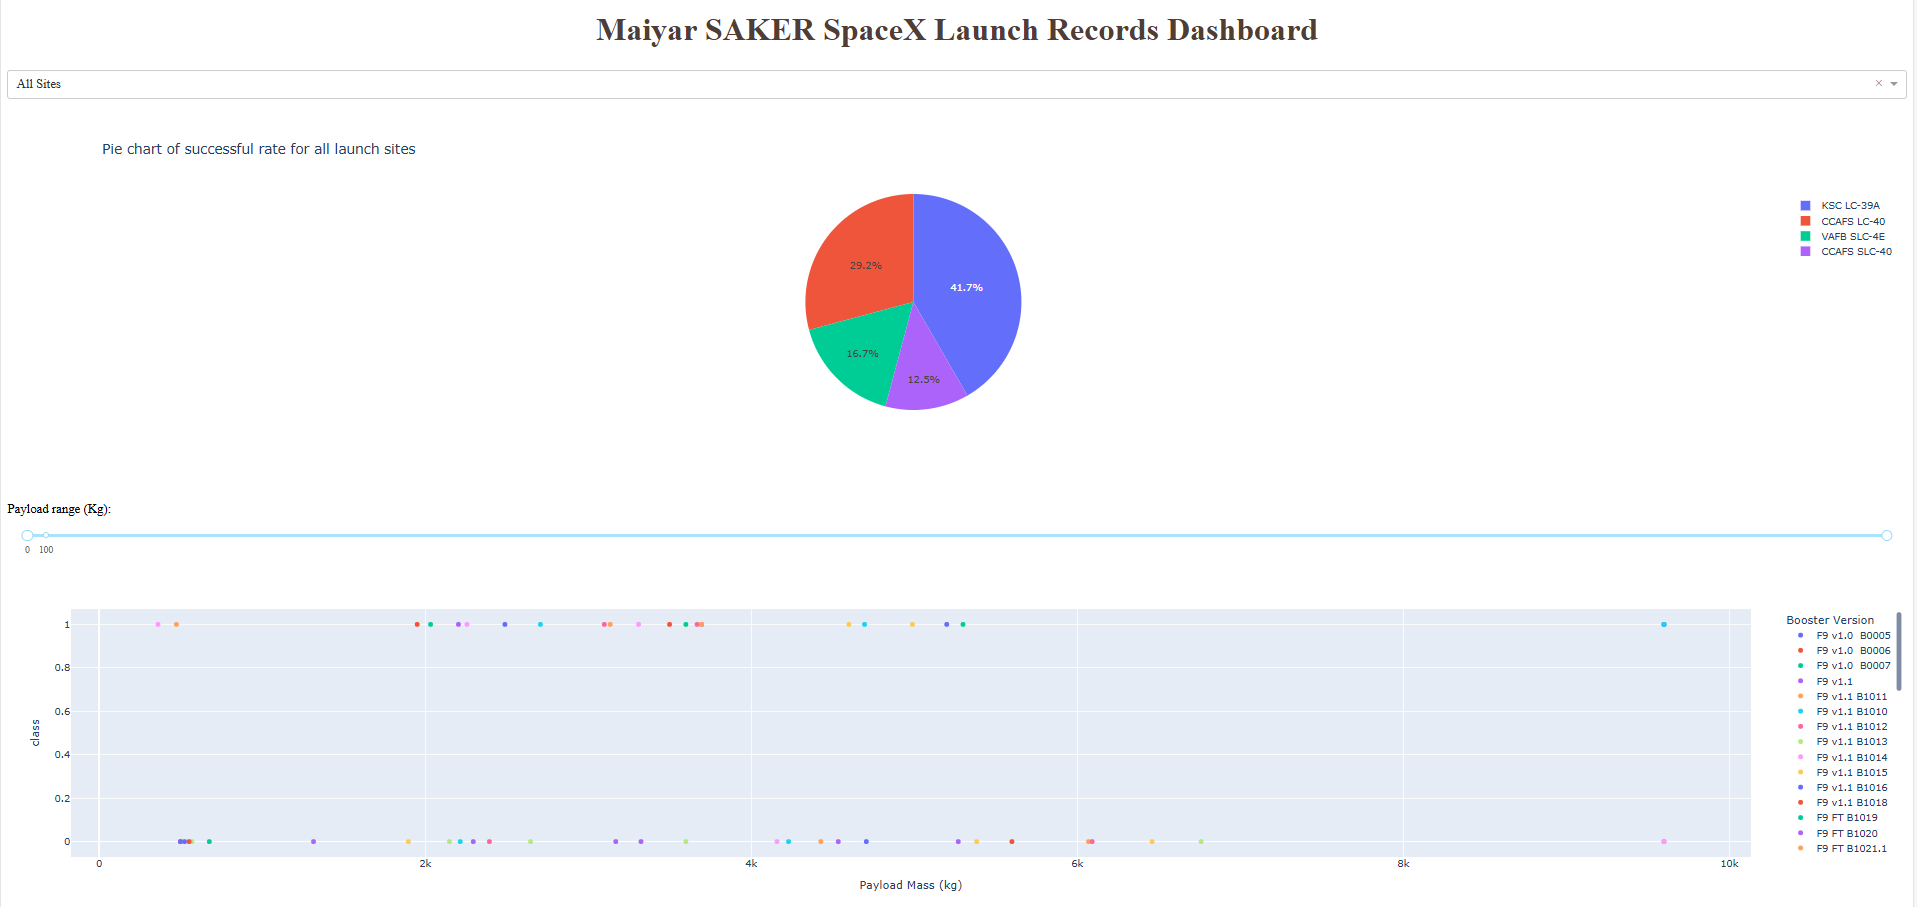

## PY SCRIPT

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('Maiyar SAKER SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',  
                                options=[{'label': 'All Sites', 'value': 'ALL'},{'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                         {'label':'CCAFS SLC-40', 'value' : 'CCAFS SLC-40'},
                                         {'label' : 'KSC LC-39A	', 'value' : 'KSC LC-39A'},
                                         {'label' : 'VAFB SLC-4E', 'value' : 'VAFB SLC-4E'}],
                                value='ALL',
                                placeholder="Select a Launch Site here",
                                searchable=True),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider', min = 0, max = 10000, step = 1000,
                                marks={0:'0', 100:'100'},
                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
    if entered_site == 'ALL':
        fig = px.pie(spacex_df, values='class', 
        names='Launch Site', 
        title='Pie chart of successful rate for all launch sites')
        return fig
    else:
            # return the outcomes piechart for a selected site
        fig = px.pie(filtered_df, 
        names='class',
        title = f"Success rate for {entered_site}")
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'),
              Input(component_id='payload-slider', component_property='value'))
def get_scatter(entered_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)']>low) & (spacex_df['Payload Mass (kg)']<high)]
    if entered_site == 'ALL':
        fig = px.scatter(filtered_df, x='Payload Mass (kg)',
        y='class', color="Booster Version")
        return fig
    else:
        # return the outcomes piechart for a selected site
        fig = px.scatter(filtered_df[filtered_df['Launch Site'] == entered_site], x='Payload Mass (kg)', 
        y='class', color="Booster Version")
        return fig

# Run the app
if __name__ == '__main__':
    app.run()

## Terminal Command :

In [ ]:
python3.11 -m pip install pandas dash

Run the following wget command line in the terminal to download dataset as spacex_launch_dash.csv :

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

Download a skeleton Dash app to be completed in this lab:

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/t4-Vy4iOU19i8y6E3Px_ww/spacex-dash-app.py"

Test the skeleton app by running the following command in the terminal:

In [ ]:
python3.11 spacex-dash-app.py

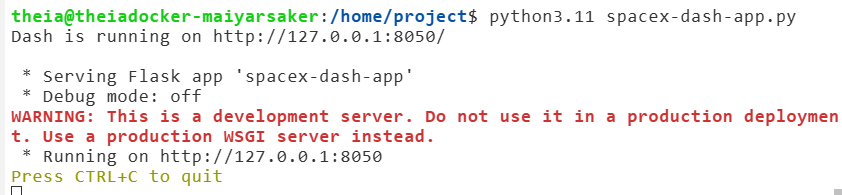

## Analysis

Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

1. Which site has the largest successful launches?

KSC LC-39A	:
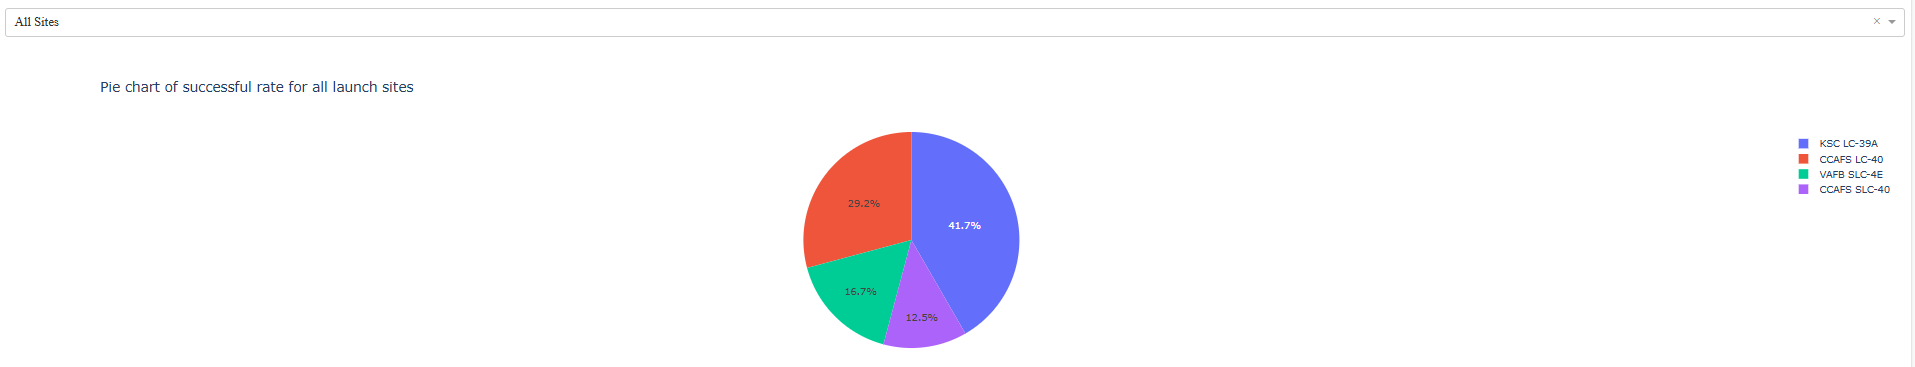

2. Which site has the highest launch success rate?

Also KSC LC-39A	:
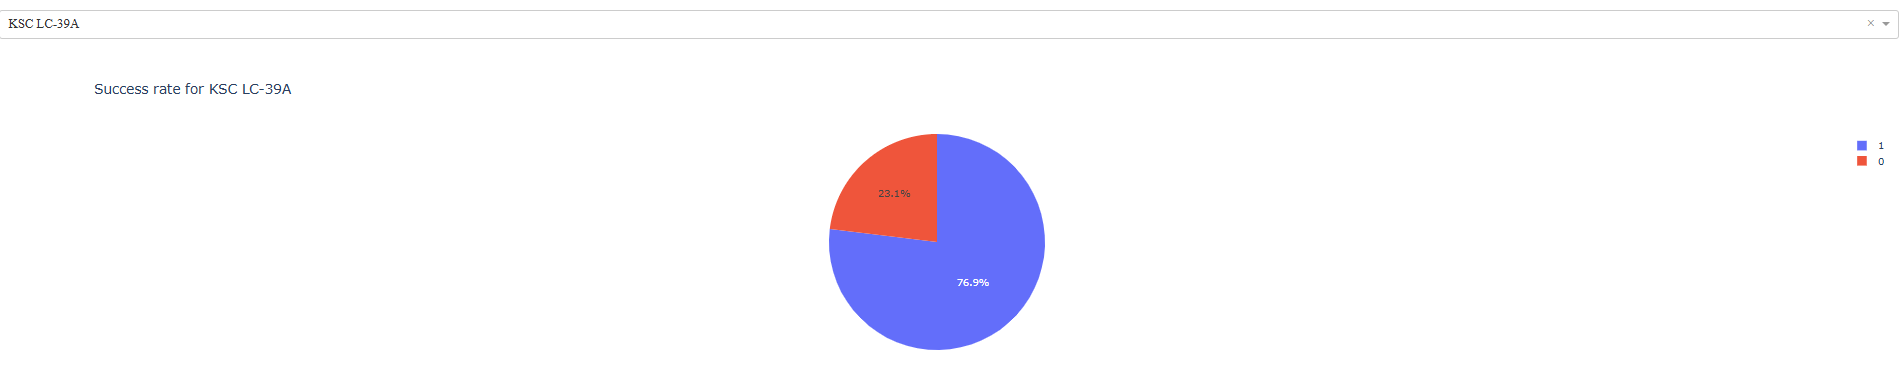

3. Which payload range(s) has the highest launch success rate?

Range between 3000 and 4000 kg has a success rate of 70%, which seems very high to me :
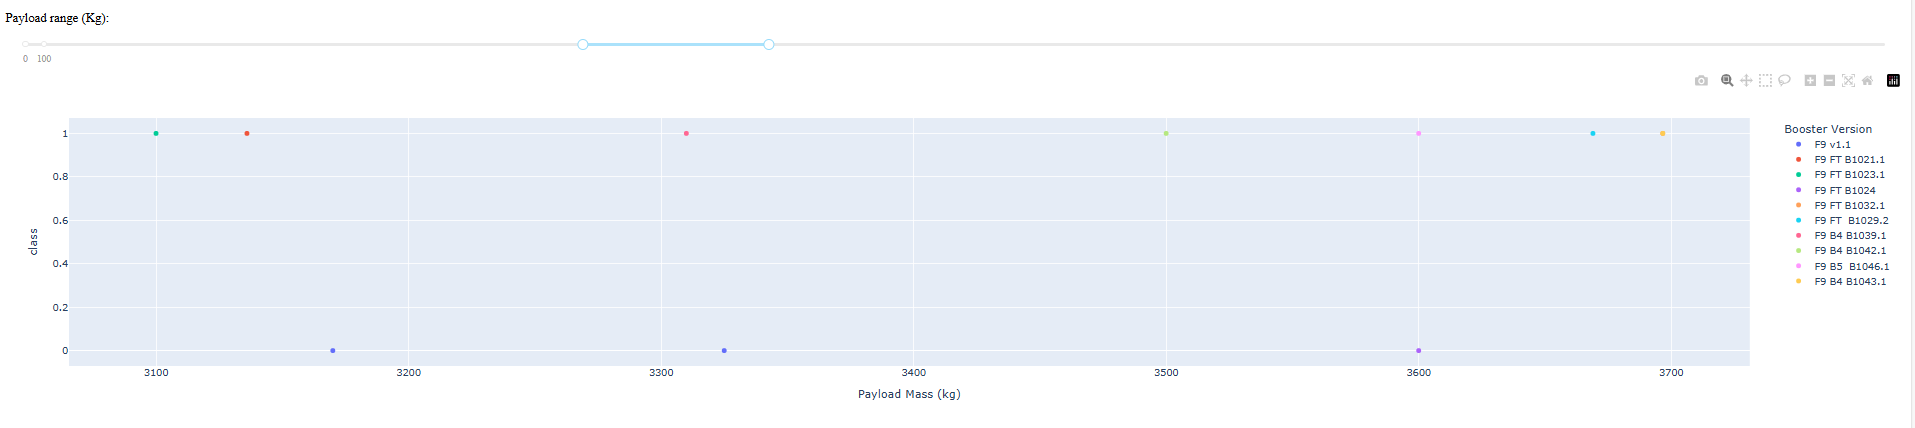

4. Which payload range(s) has the lowest launch success rate?

Between 6000 and 7000 kg, the success launch is of 0% :
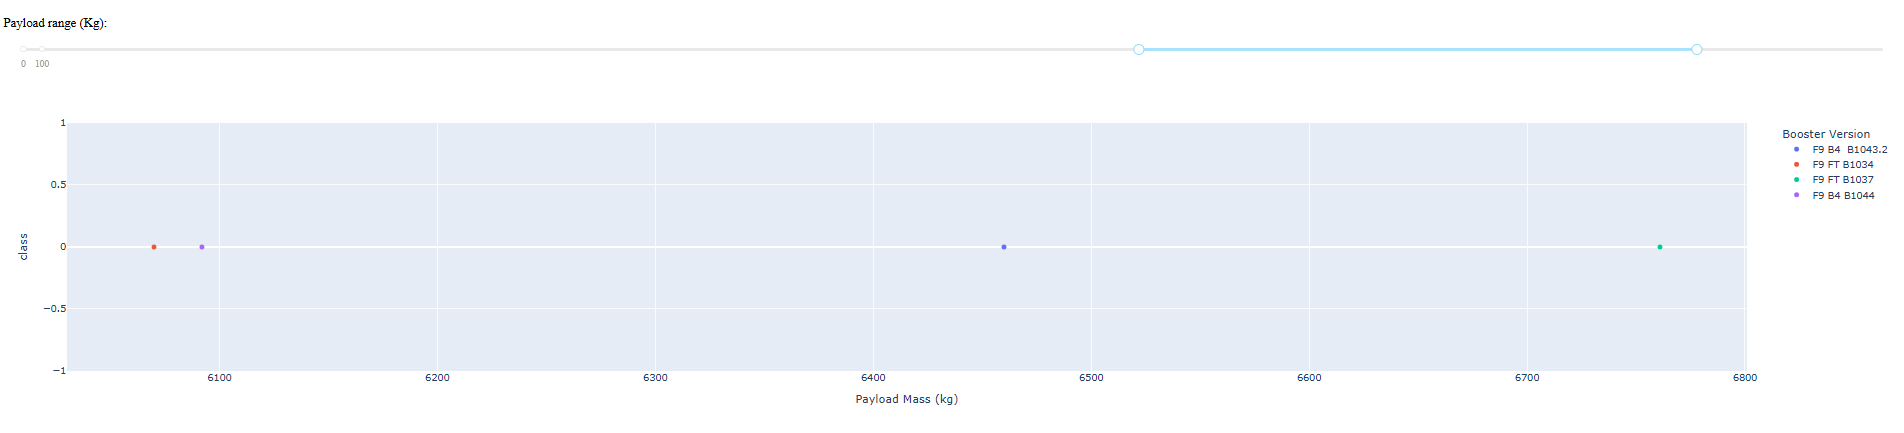

5. Which F9 Booster version (v1.0, v1.1, FT, B4, B5, etc.) has the highest
launch success rate?

F9 B5 has a succes rate of 100% but with only one shot, whereas F9 FT has a quite good success rate (around 63%) with a lot of launches :

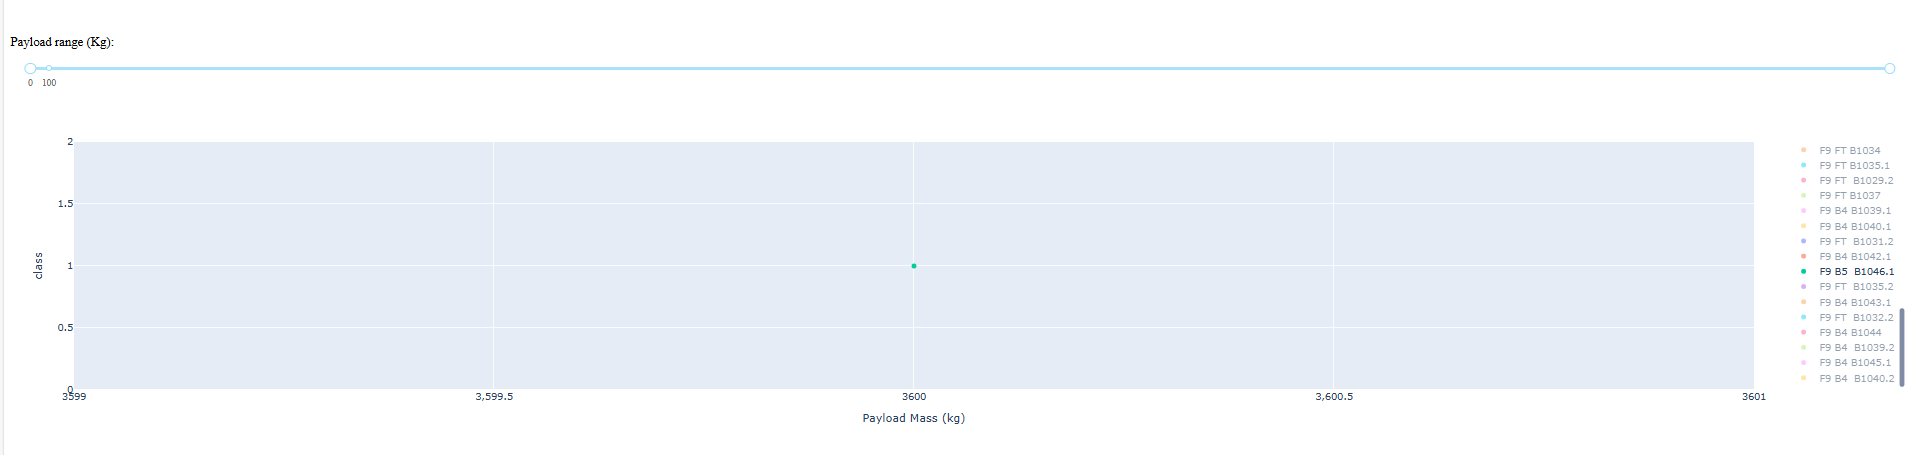
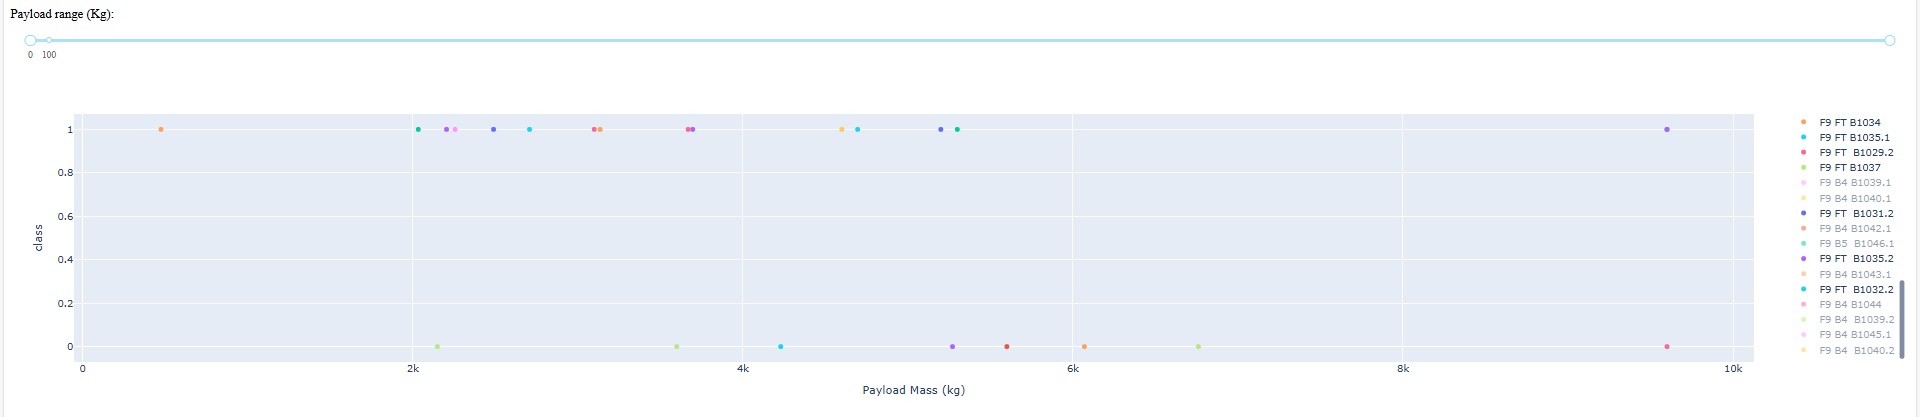
